# INTRODUCTION

This project will explore the potential correlation between a country's economic output (GDP) and the life expectancy of its citizens. The analysis will be conducted using a combination of data cleaning, visualization, and statistical analysis to uncover meaningful patterns and trends.

#### Goals:

 + Prepare the dataset by cleaning and transforming data from multiple sources to ensure accuracy and consistency.
 + Perform an exploratory analysis using visualizations to highlight trends over time and across nations.
 + Employ statistical techniques to quantify the strength of correlations between GDP and life expectancy.
   
#### Questions to Investigate:
 + How have the life expectancies and GDP values changed over the past two decades for the selected countries?
 + Is there a correlation between GDP and Life Expectancy?

By addressing these questions, the project aims to provide a comprehensive understanding of the economic factors influencing life expectancy 

## Import Pyhton Modules

Lets import the python modules that we will use through the project

In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import warnings
import statsmodels.api as sm
# Suppress specific warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Load and Explore the Data

Lets load the csv file and explore it

In [2]:
df = pd.read_csv('all_data.csv')
print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


Lets check the data quality

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


Lets see now how many countries are we dealing with and which years appear in the data

In [4]:
print(df.Country.unique())
print(df.Year.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


Now, we are going to ***adapt all columns names*** in order to have one word in each. Also, we will change every 'United States of America' for 'USA' in the Country column for visulization purposes

In [5]:
df=df.rename(columns={'Life expectancy at birth (years)':'LEABY'})
df['Country']=df['Country'].str.replace('United States of America', 'USA')
print(df.columns)

Index(['Country', 'Year', 'LEABY', 'GDP'], dtype='object')


### Exploratory Visuals

First of all, lets explore the **GDP** and Life Expectancy at birth (**LEABY**) for each country

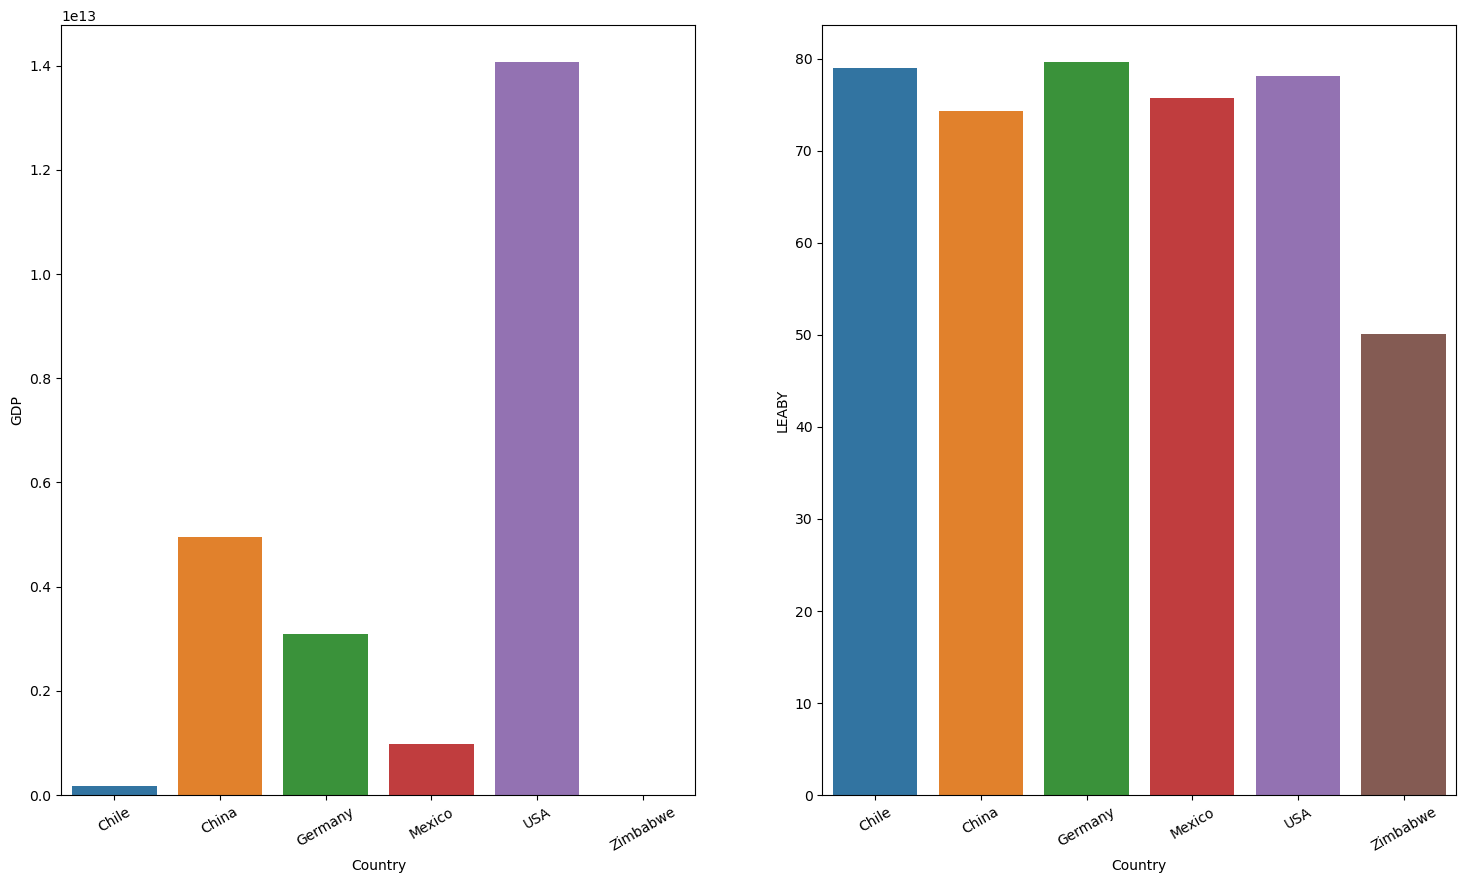

In [6]:
plt.figure(figsize=(18,10))
plt.subplot(1,2,1)
sns.barplot(x='Country', y='GDP',data=df, errorbar=None)
plt.xticks(rotation=30)
plt.subplot(1,2,2)
sns.barplot(x='Country',y='LEABY',data=df,errorbar=None)
plt.xticks(rotation=30)
plt.show()

Now that we have a general vision, lets try to answer the different questions proposed on the Introduction.

### How have the life expectancies and GDP values changed over the past two decades for the selected countries?

For this purpose, the most visual and easy to understand solution will be a Line Plot

First, lets see the ***LEABY over the years for each Country***

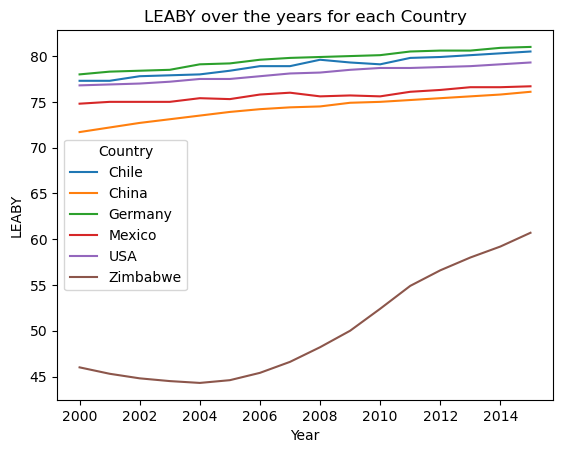

In [7]:
sns.lineplot(x='Year', y='LEABY',data=df, hue='Country' )
plt.title('LEABY over the years for each Country')
plt.show()

Second, lets see how the GPA has varied in every country

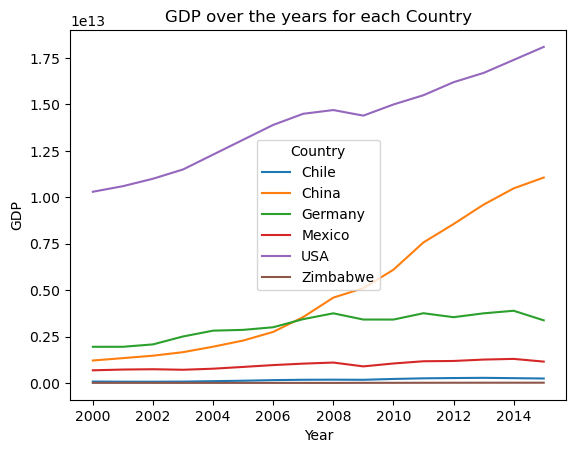

In [8]:
sns.lineplot(x='Year', y='GDP',data=df, hue='Country' )
plt.title('GDP over the years for each Country')
plt.show()

In this case, as there are big differences between countries, it might be usefull to plot each one of the separetly

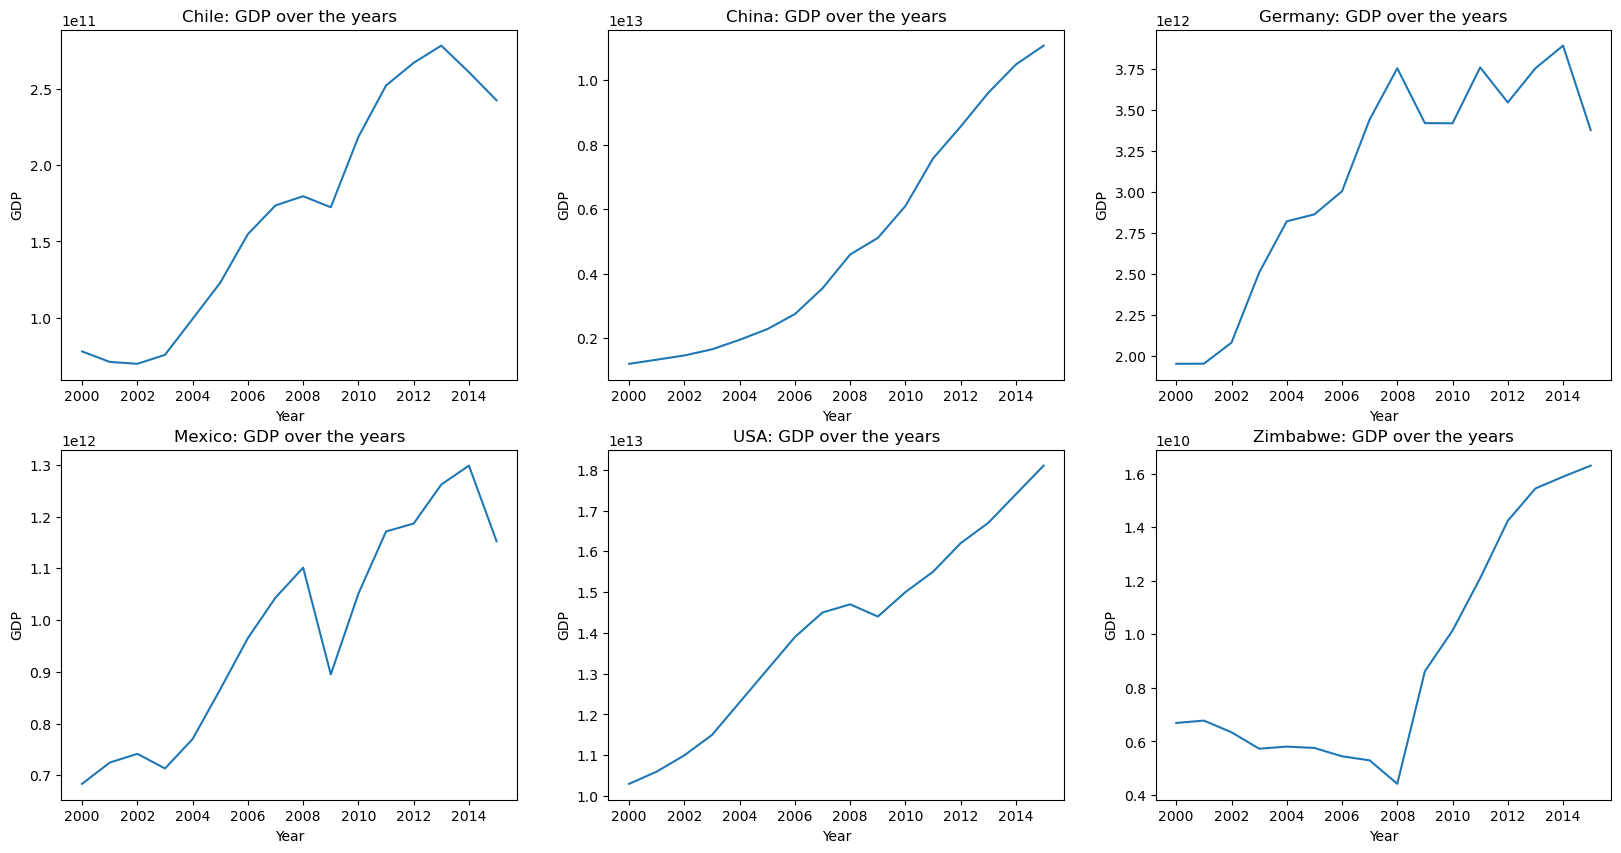

In [9]:
i=1
plt.figure(figsize=(20,10))
for country in df.Country.unique():
    plt.subplot(2,3,i)
    sns.lineplot(x='Year', y='GDP', data=df[df.Country==country])
    plt.title(f"{country}: GDP over the years")
    i=i+1
plt.show()
                 

## Conclusions: GDP and Life Expectancy in Six Nations

1. **Wide GDP Variations**:  
   The **USA** and **China** lead with significantly higher GDPs, demonstrating their global economic influence, while **Zimbabwe** consistently reports the lowest GDP, reflecting ongoing economic challenges.

2. **Economic Growth in Developing Nations**:  
   Countries like **Mexico** and **China** have seen considerable GDP growth over time, indicating their emerging status as growing economies.

3. **Steady GDP in Developed Nations**:  
   **Germany** and the **USA** maintain stable, high GDPs, representing long-standing industrial and technological growth in these countries.

4. **High Life Expectancy in Developed Countries**:  
   Countries such as **Germany**, the **USA**, and **China** show high life expectancy, supported by strong healthcare systems and high living standards.

5. **Improvements in Developing Countries' Life Expectancy**:  
   Nations like **Mexico** and **China** have shown steady improvements in life expectancy, reflecting social and healthcare advancements.

6. **Low Life Expectancy in Zimbabwe**:  
   **Zimbabwe** continues to have the lowest life expectancy, likely due to political and economic instability affecting healthcare and living conditions.

### Is there a correlation between GDP and Life Expectancy?

Lets study the general correlation with a scatter plot and calculating the correlation index for every country

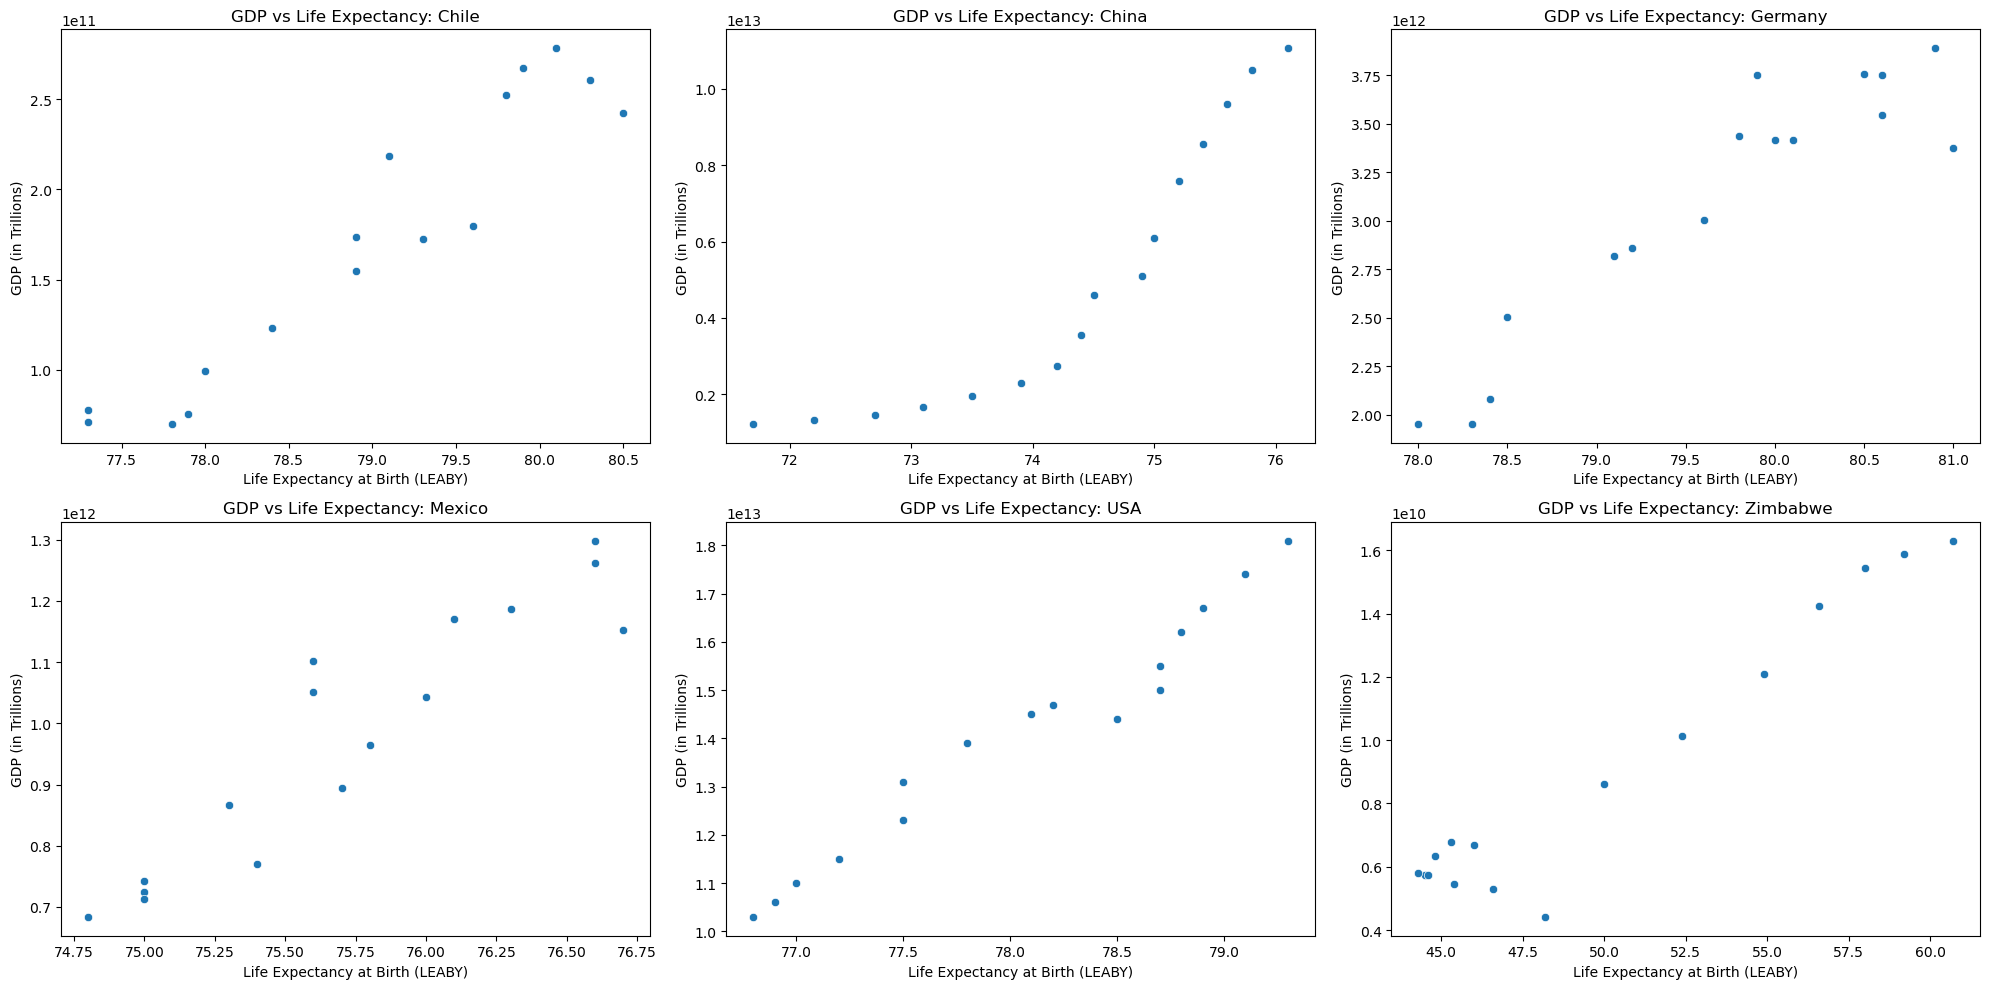

{'Chile': 0.9498766659254417, 'China': 0.9085255408648356, 'Germany': 0.9326988982561274, 'Mexico': 0.9322377167847082, 'USA': 0.9817092382430256, 'Zimbabwe': 0.9661998955858779}


In [10]:
i = 1
plt.figure(figsize=(20,10))
correlations = {}

for country in df.Country.unique():
    plt.subplot(2, 3, i)
    sns.scatterplot(x='LEABY', y='GDP', data=df[df.Country == country])
    plt.xlabel('Life Expectancy at Birth (LEABY)')
    plt.ylabel('GDP (in Trillions)')
    plt.title(f'GDP vs Life Expectancy: {country}')
    
    country_data = df[df.Country == country]
    correlation = country_data['GDP'].corr(country_data['LEABY'], method='pearson')
    
    correlations[country] = correlation
    
    i += 1

plt.tight_layout()
plt.show()

print(correlations)


## Conclusions: GDP and Life Expectancy correlation

Across all the countries analyzed, there is a ***strong positive correlation between GDP and Life Expectancy***, as reflected in both the numerical results and scatter plots. In developed nations like USA (0.98), Germany (0.93), and Chile (0.95), higher GDP levels are closely associated with longer life expectancies, suggesting that economic growth translates directly into better healthcare, infrastructure, and living conditions. Surprisingly, even in Zimbabwe (0.96), where economic challenges are prevalent, the data shows that increases in GDP correlate strongly with improvements in life expectancy. This demonstrates that regardless of a country's overall economic status, GDP growth tends to significantly impact public health and longevity. The visual analysis from the scatter plots reinforces this finding, as the data points cluster tightly along an upward trend for each country.